In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

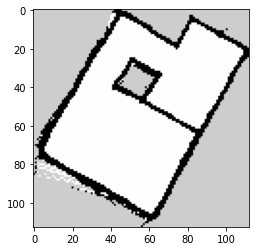

In [8]:
img = cv.imread('turtle_map.pgm')
plt.imshow(img)
plt.show()

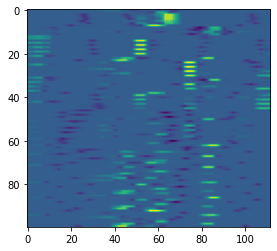

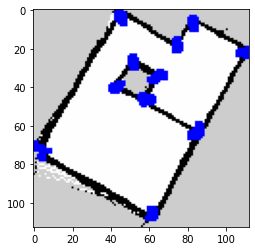

In [48]:

# filename = 'map_example.png'
# img = cv.imread('example_2.png')
img = cv.imread('turtle_map.pgm')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
kernel = np.ones((5,5),np.float32)/49
# gray = cv.filter2D(gray,-1,kernel)
# gray = cv.blur(gray,(7,7))

gray = cv.bilateralFilter(gray,9,75,75)
# gray = cv.medianBlur(gray,5)


dst = cv.cornerHarris(gray,6,3,0.1)  # 0.04

# dst_norm = np.empty(dst.shape, dtype=np.float32)
# cv.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
# dst_norm_scaled = cv.convertScaleAbs(dst_norm)
# # Drawing a circle around corners
# for i in range(dst_norm.shape[0]):
#     for j in range(dst_norm.shape[1]):
#         if int(dst_norm[i,j]) > 0:
#             cv.circle(dst_norm_scaled, (j,i), 5, (0), 2)





#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)

centers = cv.kmeans(dst, 100, None, None, 10, cv.KMEANS_RANDOM_CENTERS)[2]
plt.imshow(centers)
plt.show()
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.2*dst.max()] = [255,0,0]  # before it was 0.2  (255,0,0) for blue dots

new = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(new)
plt.show()

# cv.imshow('dst',img)
# if cv.waitKey(0) & 0xff == 27:
#     cv.destroyAllWindows()